In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

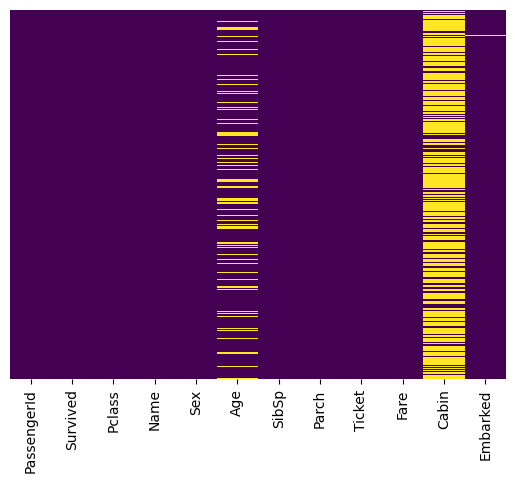

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

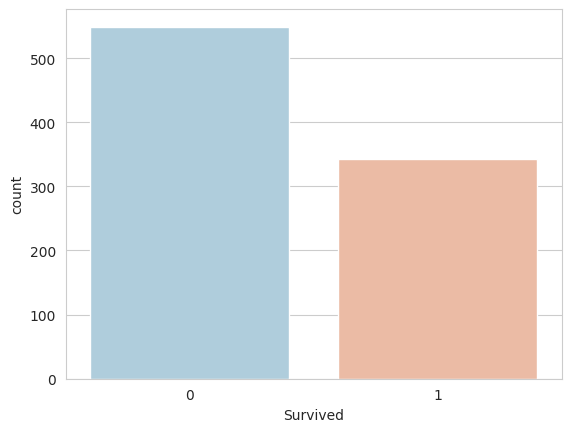

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

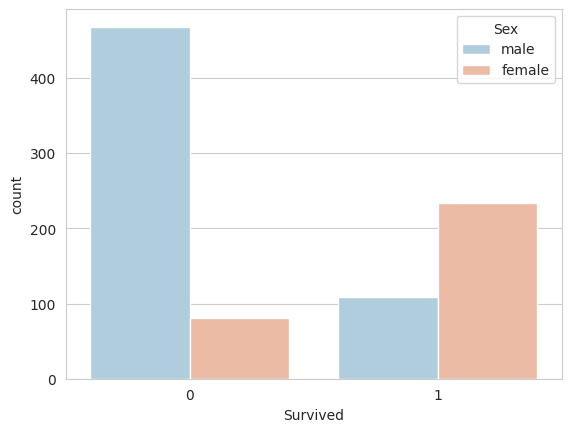

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

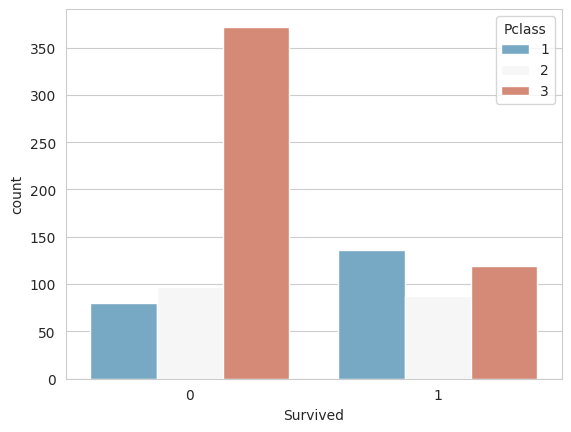

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='RdBu_r')

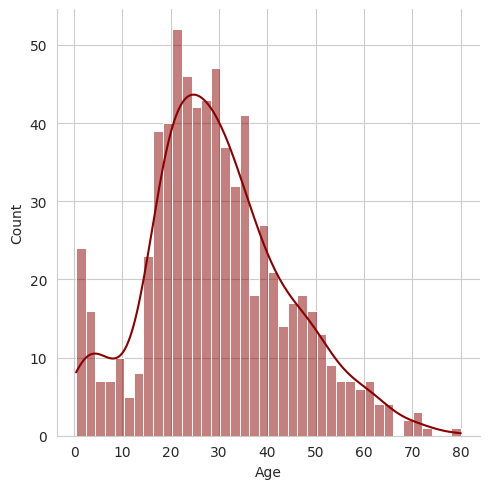

In [16]:
sns.displot(train['Age'].dropna(), kde=True, color='darkred', bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

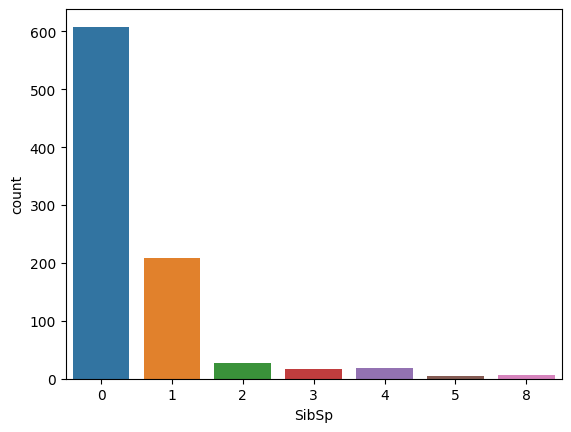

In [6]:
sns.countplot(x='SibSp', data=train)

<Axes: >

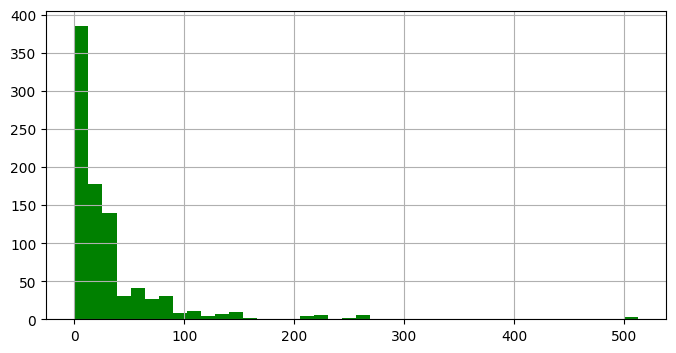

In [7]:
train['Fare'].hist(color='green', bins=40, figsize=(8, 4))

<Axes: xlabel='Pclass', ylabel='Age'>

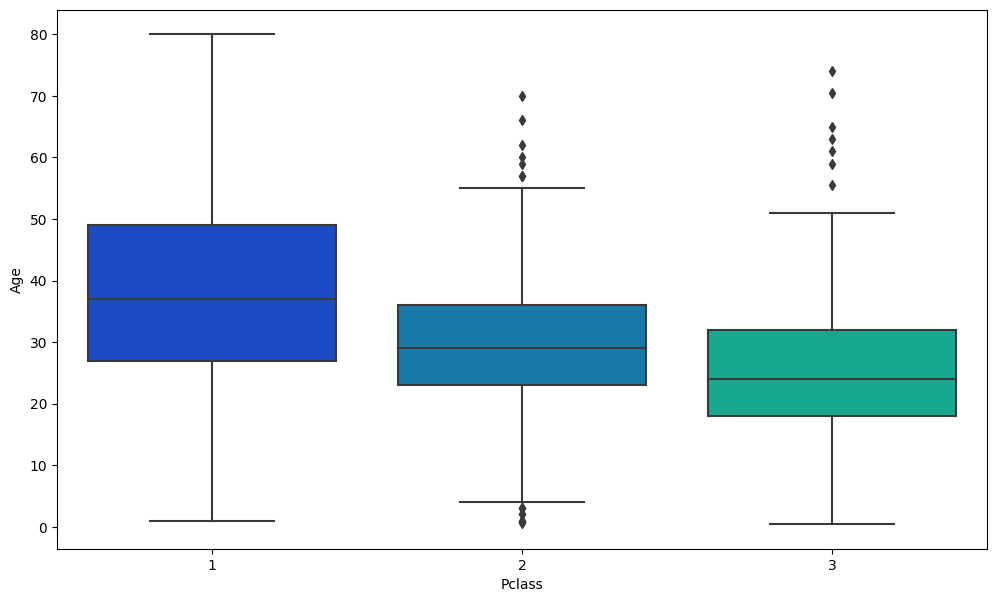

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [12]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<Axes: >

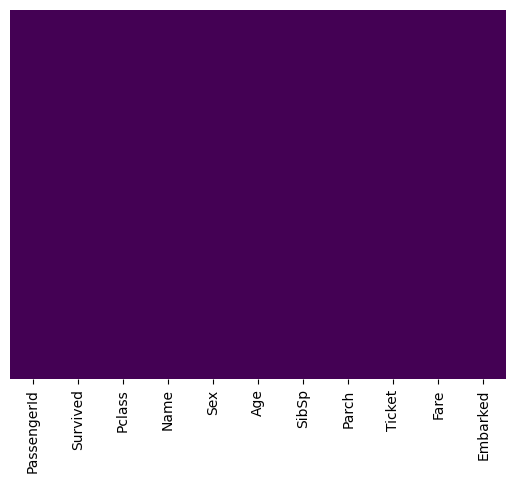

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [14]:
train.drop('Cabin', axis = 1, inplace=True)

In [16]:
train.dropna(inplace=True)

In [18]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [19]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [20]:
train = pd.concat([train, sex, embark], axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

/home/anil/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predict = log_model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(predict, y_test)

array([[148,  39],
       [ 15,  65]])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(predict, y_test)

0.797752808988764